In [ ]:
# -*- coding: utf-8 -*-
"""cnn_kaggle.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1yzWjzTI2dUZDqYZqhKcdVHf3E-eJ9Y4o
"""
!pip install tensorflow
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import math,random


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Kagsot/

Mounted at /content/drive/
/content/drive/MyDrive/Kagsot


In [ ]:
tb=pd.read_csv('trainbasekagsot.csv')
tbtm=pd.read_csv('test_base_&_train_metakagsot.csv')
tm=pd.read_csv('test_metakagsot.csv')

In [ ]:
tb=tb.dropna()
tbtm=tbtm.dropna()
tm=tm.dropna()

In [ ]:
t1=pd.read_csv('train.csv')
t2=pd.read_csv('test.csv')
t3=pd.read_csv('submit.csv')
t2['label']=t3['label']

In [ ]:
t=pd.concat([t2,t1])

In [ ]:
tr=pd.read_csv('subsetforbagkagsot.csv')
tst=pd.read_csv('testforbagkagsot.csv')
# r=pd.read_csv('realnews_collected_by_us.csv')
# trst=pd.concat([tst,r])

In [ ]:
# print(tr.head(2))
print(tst.head(2))

                                                text  label
0  Trump names Don McGahn as White House Counsel ...      1
1  Senate Judiciary Committee seeks Comey memos, ...      1


In [ ]:
# trb.head(2)
# tbtm.head(2)
tb=tb.dropna()
tbtm=tbtm.dropna()
tm=tm.dropna()
tb['label']=tb['label'].astype(int)
tbtm['label']=tbtm['label'].astype(int)
tm['label']=tm['label'].astype(int)

In [ ]:
tr=tr.dropna()
tr['label']=tr['label'].astype(int)
df=tr
tst=tst.dropna()
tst['label']=tst['label'].astype(int)

<ipython-input-4-7d3b54222a19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['label']=tr['label'].astype(int)


In [ ]:
sz=len(tr)
def modifydatabag(t1):
  res=[]
  a=int(sz*0.90)
  start=0
  end=len(t1)
  for i in range(a):
    res.append(t1.iloc[random.randrange(start,end)])
  return res
#pass only test dataset for modification
data=modifydatabag(tr)

In [ ]:
# df =pd.DataFrame(data,columns=['text','label'])
# df['title_text']=df['text']
# df.head(2)

In [ ]:
# df =pd.DataFrame(data,columns=['text','label'])
df['title_text']=df['text']
df['class']=df['label']
tst['title_text']=tst['text']
tst['class']=tst['label']
df.head(2)

,text,label,title_text,class
18985,Republican Trump's new finance chair previousl...,1,Republican Trump's new finance chair previousl...,1
32678,"OBAMA’S RACISM CZAR, “REVEREND” AL SHARPTON CA...",0,"OBAMA’S RACISM CZAR, “REVEREND” AL SHARPTON CA...",0


In [ ]:
print(tm)

                                                   text  label
0     The Antichrist and False Prophet The Antichris...      1
1     Twitter Using Watson A.I. to Crack Down on ’Ab...      1
2     Palm Beach County Sheriff: Police Dog Took a B...      0
3     Hollywood Weaponizes Against Trump: CAA to Hos...      0
4     Nota conceptual para la presidencia de Rusia R...      1
...                                                 ...    ...
4075  The People Are Laughing at the Liberal Media  ...      1
4076  Hot Mic: DHS Chief John Kelly Jokes Trump Can ...      0
4077  EXCLUSIVE: Former Secret Service Agent Warns T...      0
4078  Concern Mounts as Over 250 Earthquakes Hit Bor...      0
4079  POLL: What Are We Going To Do With These Women...      1

[4080 rows x 2 columns]


In [ ]:
df=tb
df['class']=df['label']
df['title_text']=df['text']

tbtm['class']=tbtm['label']
tbtm['title_text']=tbtm['text']

tm['class']=tm['label']
tm['title_text']=tm['text']
t2=tm

<ipython-input-15-9f6a95b417fa>:60: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title_text'] = df['title_text'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '').str.strip()
<ipython-input-15-9f6a95b417fa>:61: FutureWarning: The default value of regex will change from True to False in a future version.
  t2['title_text'] = t2['title_text'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '').str.strip()


Epoch 1/2
1218/1218 [==============================] - 97s 79ms/step - loss: 0.2291 - accuracy: 0.9040 - val_loss: 0.1398 - val_accuracy: 0.9467
Epoch 2/2
448/448 [==============================] - 3s 6ms/step
Accuracy with CNN: 0.9467075892857143
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      7324
         1.0       0.93      0.96      0.95      7012

    accuracy                           0.95     14336
   macro avg       0.95      0.95      0.95     14336
weighted avg       0.95      0.95      0.95     14336



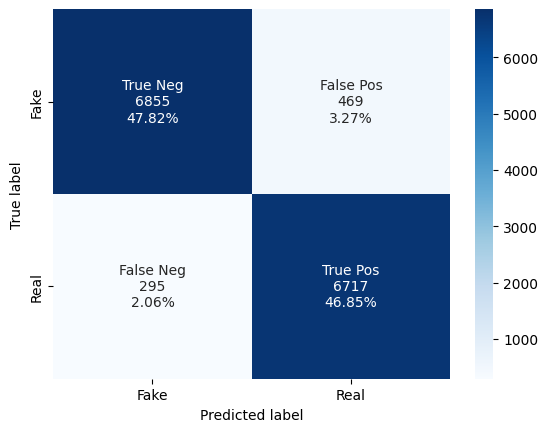

In [ ]:

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('conf.png')  

    if title:
        plt.title(title)

# Load the fake and real news datasets
# df = pd.read_csv('train.csv')

# Add a label to the dataset
#df['label'] = np.where(df['label'] == 'Fake', 0, 1)
# df=tr

df['class']=df['label']
t2['class']=t2['label']
df['title_text']=df['text']
t2['title_text']=t2['text']
# Preprocess the text data
df['title_text'] = df['title_text'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '').str.strip()
t2['title_text'] = t2['title_text'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '').str.strip()
# Split the dataset into training and testing sets
X_train = df['title_text']
y_train = df['class']
X_test = t2['title_text']
y_test = t2['class']
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

# Convert X_train and X_test to string values
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
maxlen = 1000
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Fake', 'Real']


# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=maxlen))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)

y_pred_classes = np.round(y_pred).flatten()
resdf = pd.DataFrame(y_pred_classes, columns=['label'])

print("Accuracy with CNN: {}".format(accuracy_score(y_test, y_pred_classes)))
print(classification_report(y_test, y_pred_classes))
#cm = confusion_matrix(y_test, y_pred_classes)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.show()
cm = confusion_matrix(y_test, y_pred_classes)
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='Blues')


In [ ]:
v=pd.read_csv('testmetakagsot.csv')
print(v)

       svm  nb  lg
0        0   0   0
1        1   0   1
2        0   0   0
3        1   1   1
4        1   1   1
...    ...  ..  ..
14331    0   0   0
14332    1   0   1
14333    1   1   1
14334    0   0   0
14335    0   0   0

[14336 rows x 3 columns]


In [ ]:
v['cnn']=resdf['label']

In [ ]:
v['cnn']=v['cnn'].astype(int)
print(v)

       svm  nb  lg  cnn
0        0   0   0    0
1        1   0   1    1
2        0   0   0    0
3        1   1   1    1
4        1   1   1    1
...    ...  ..  ..  ...
14331    0   0   0    0
14332    1   0   1    1
14333    1   1   1    1
14334    0   0   0    0
14335    0   0   0    1

[14336 rows x 4 columns]


In [ ]:
v.to_csv('testmetakagsot.csv',index=False)